<a href="https://colab.research.google.com/github/hasibkyau/HandwritingDigitRecognition/blob/hasib/HandwritingDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#len(x_train)
#x_train[0].shape
#x_train[0]
#plt.matshow(x_train[0])
#x_train.shape  
#Scaling & Reshaping the matrix
x_train = x_train / 255;
x_test = x_test / 255;
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
#x_train_flattened.shape
#plt.matshow(x_test[0])

(28, 28)

In [ ]:
#Creating simple neural network
model = keras.Sequential([
  keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)

model.evaluate(x_test_flattened, y_test)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4664 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [ ]:
#predicting the test data with the all probabiliy of 0 to 9
y_predicted = model.predict(x_test_flattened)
#len(y_predicted) 
np.argmax(y_predicted[0])

10000

In [ ]:
#labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

NameError: ignored

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    6,    6,    2,    2,    0],
       [   0, 1116,    2,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  926,   13,    8,    5,   11,   11,   44,    2],
       [   2,    0,   18,  919,    0,   28,    2,   12,   23,    6],
       [   2,    1,    6,    1,  918,    0,   10,    6,   11,   27],
       [   9,    3,    3,   31,    9,  777,   13,    6,   35,    6],
       [   9,    3,    9,    1,    7,   15,  909,    2,    3,    0],
       [   1,    7,   21,    7,    8,    0,    0,  958,    3,   23],
       [   6,    8,    5,   18,    9,   23,    8,   12,  880,    5],
       [  10,    7,    1,    9,   29,    8,    0,   33,   11,  901]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

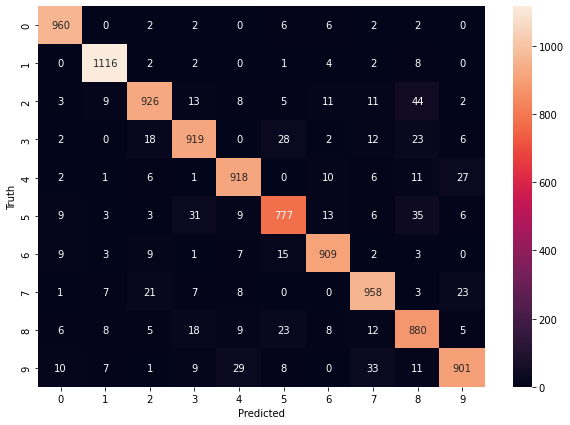

In [ ]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Adding more Layers in the model
model = keras.Sequential([
  keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1195 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0496 - accuracy: 0.9846


this digit is probably a 0


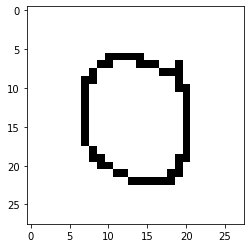

this digit is probably a 2


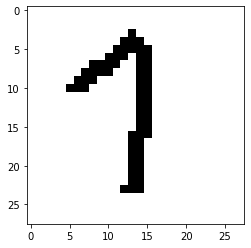

this digit is probably a 2


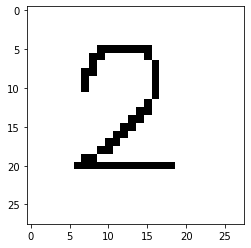

this digit is probably a 3


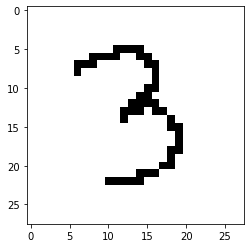

this digit is probably a 4


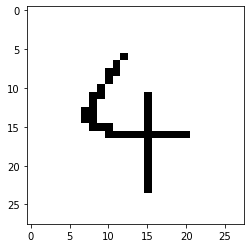

this digit is probably a 5


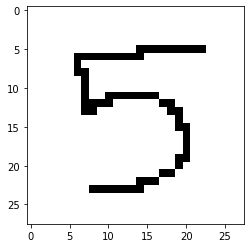

this digit is probably a 6


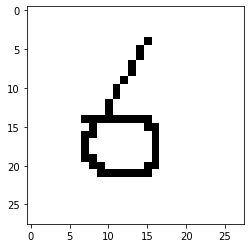

this digit is probably a 7


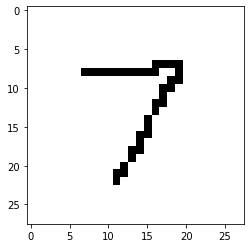

this digit is probably a 8


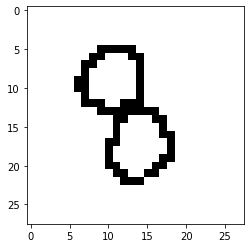

this digit is probably a 9


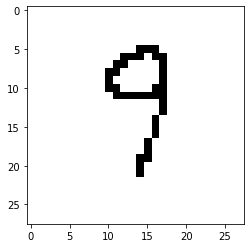

this digit is probably a 4


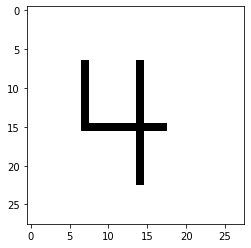

this digit is probably a 4


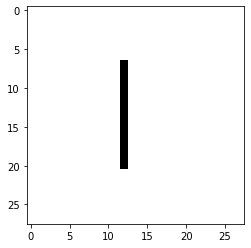

this digit is probably a 5


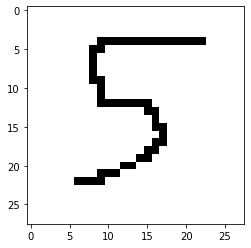

In [ ]:

image_number = 0
while os.path.isfile(f"/content/drive/MyDrive/NeuralNetwork/Projects/digits/digit{image_number}.png"):
    try:
      img = cv2.imread(f"/content/drive/MyDrive/NeuralNetwork/Projects/digits/digit{image_number}.png")[:, :, 0]
      img = np.invert(np.array([img]))
      img = img/255
      img_flattened = img.reshape(len(img),28*28)
      prediction = model.predict(img_flattened)
      print(f"this digit is probably a {np.argmax(prediction)}")
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
    except:
      print("Error!")
    finally:
      image_number += 1

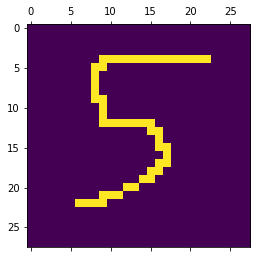

In [ ]:
plt.matshow(img[0])